In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("../data/loan_customers.csv")
df.head()


,customer_id,age,income,loan_amount,tenure,employment_type,credit_score,city,default_flag
0,1,25.0,25000.0,50000.0,12.0,Contract,580,Delhi,1.0
1,2,35.0,60000.0,200000.0,24.0,Salaried,Mumbai,720,0.0
2,3,40.0,45000.0,150000.0,36.0,Business,650,Pune,0.0
3,4,29.0,30000.0,80000.0,12.0,Contract,590,Delhi,1.0
4,5,50.0,80000.0,300000.0,48.0,Salaried,780,Mumbai,0.0


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      82 non-null     object 
 1   age              81 non-null     float64
 2   income           81 non-null     float64
 3   loan_amount      81 non-null     float64
 4   tenure           81 non-null     float64
 5   employment_type  81 non-null     object 
 6   credit_score     81 non-null     object 
 7   city             81 non-null     object 
 8   default_flag     81 non-null     float64
dtypes: float64(5), object(4)
memory usage: 5.9+ KB


customer_id        0
age                1
income             1
loan_amount        1
tenure             1
employment_type    1
credit_score       1
city               1
default_flag       1
dtype: int64

In [12]:
df["credit_score"] = pd.to_numeric(df["credit_score"], errors='coerce')
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].mean())
default_rate = df["default_flag"].mean() * 100

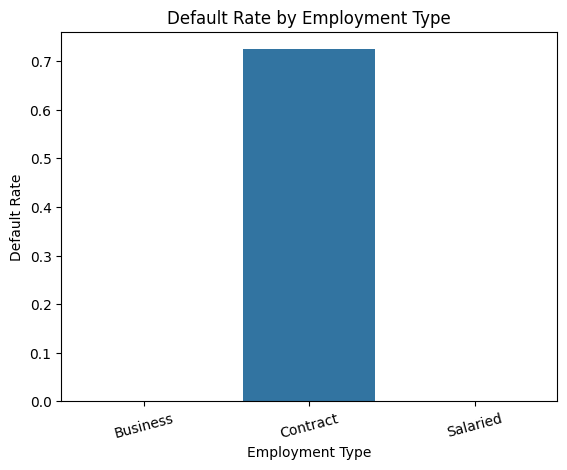

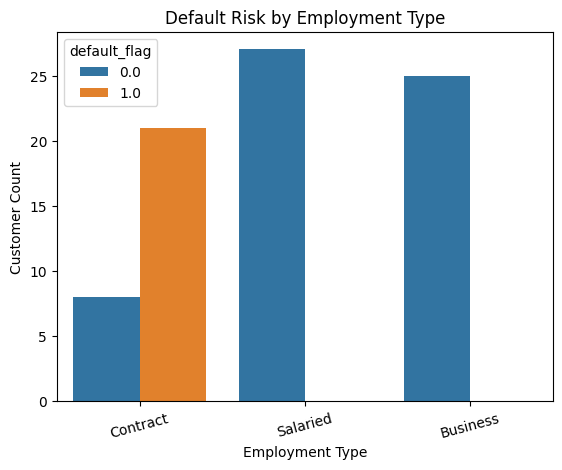

default_flag,0.0,1.0,All
employment_type,,,
Business,25,0,25
Contract,8,21,29
Salaried,27,0,27
All,60,21,81


In [13]:
emp_risk = df.groupby("employment_type")["default_flag"].mean().reset_index()

sns.barplot(x="employment_type", y="default_flag", data=emp_risk)
plt.title("Default Rate by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=15)
plt.show()

sns.countplot(x="employment_type", hue="default_flag", data=df)
plt.title("Default Risk by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=15)
plt.show()

## Show Risk Table (Numbers Behind the Chart)
pd.crosstab(df["employment_type"], df["default_flag"], margins=True)


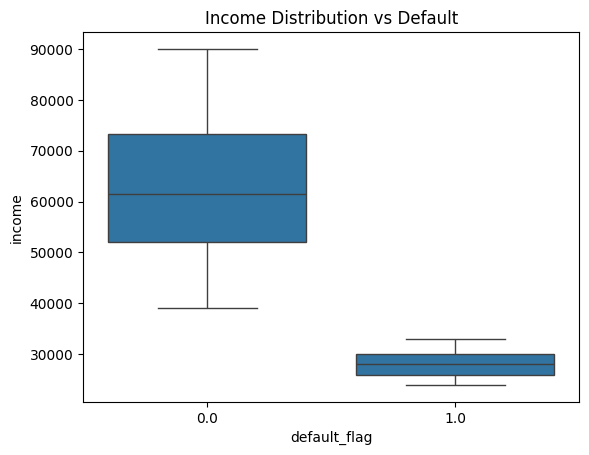

In [14]:
sns.boxplot(x="default_flag", y="income", data=df)
plt.title("Income Distribution vs Default")
plt.show()

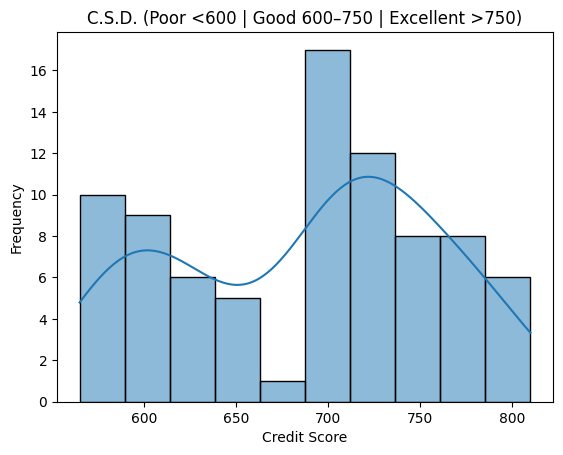

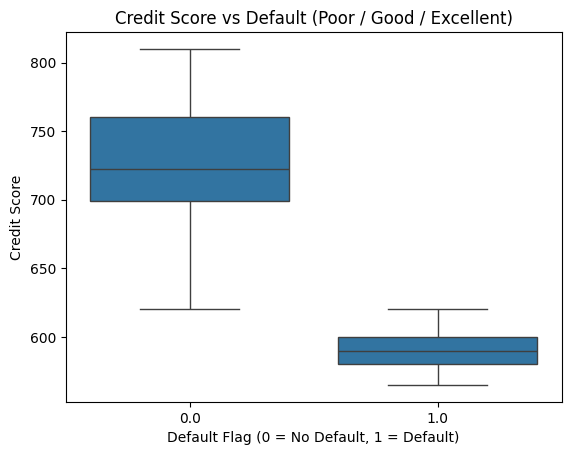

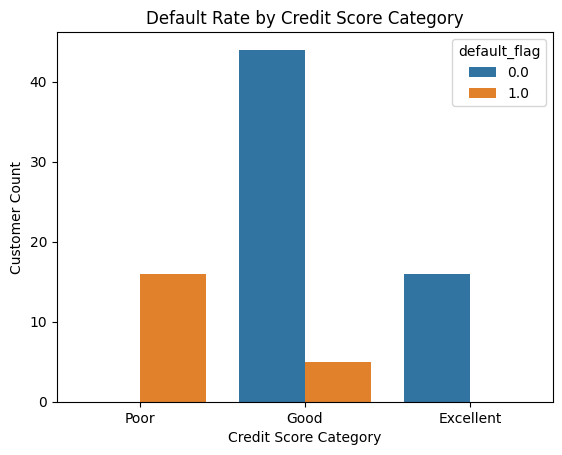

In [15]:
df["credit_score_group"] = pd.cut(
    df["credit_score"],
    bins=[0, 600, 750, 850],
    labels=["Poor", "Good", "Excellent"]
)
sns.histplot(df["credit_score"], bins=10, kde=True)
plt.title("C.S.D. (Poor <600 | Good 600–750 | Excellent >750)")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x="default_flag", y="credit_score", data=df)
plt.title("Credit Score vs Default (Poor / Good / Excellent)")
plt.xlabel("Default Flag (0 = No Default, 1 = Default)")
plt.ylabel("Credit Score")
plt.show()

sns.countplot(x="credit_score_group", hue="default_flag", data=df)
plt.title("Default Rate by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Customer Count")
plt.show()


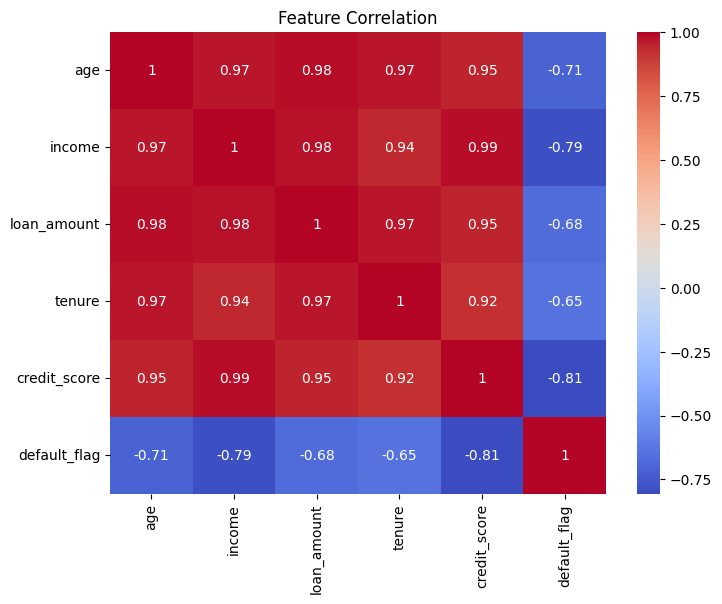

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [21]:

df["income"] = pd.to_numeric(df["income"], errors="coerce")

df["income_group"] = pd.cut(
    df["income"],
    bins=[0,30000,60000,100000],
    labels=["Low","Medium","High"]
)

df["risk_flag"] = np.where(df["credit_score"] < 600, "High Risk", "Low Risk")

df[["income", "income_group","credit_score","risk_flag"]].head(10)


,income,income_group,credit_score,risk_flag
0,25000.0,Low,580.0,High Risk
1,60000.0,Medium,687.5,Low Risk
2,45000.0,Medium,650.0,Low Risk
3,30000.0,Low,590.0,High Risk
4,80000.0,High,780.0,Low Risk
5,28000.0,Low,600.0,Low Risk
6,52000.0,Medium,710.0,Low Risk
7,75000.0,High,740.0,Low Risk
8,48000.0,Medium,680.0,Low Risk
9,26000.0,Low,575.0,High Risk
